# Perceptron Empirical Risk

## Introduction

The perceptron is a simple linear binary classifier. In this notebook, we'll explore the concept of perceptron empirical risk and how it relates to finding a separating hyperplane for linearly separable data.

## Perceptron Model

Let's define our perceptron model:

- Input: $\mathbf{x} \in \mathbb{R}^D$
- Weights: $\mathbf{w} \in \mathbb{R}^D$
- Bias: $b \in \mathbb{R}$
- Output: $y = \text{sign}(\mathbf{w}^T\mathbf{x} + b)$

Where $\text{sign}(z)$ is the sign function:
$$
\text{sign}(z) = \begin{cases}
    +1 & \text{if } z \geq 0 \\
    -1 & \text{if } z < 0
\end{cases}
$$

## Geometric Interpretation

The decision boundary of the perceptron is a hyperplane defined by:

$$\mathbf{w}^T\mathbf{x} + b = 0$$

- $\mathbf{w}$ is the normal vector to the hyperplane
- $b$ is the bias term

The goal is to find $\mathbf{w}$ and $b$ that correctly separate the two classes.

## Perceptron Empirical Risk

The perceptron empirical risk is defined as:

$$P(\mathbf{w}, b) = \frac{1}{N}\sum_{n=1}^N \max\{0, -y_n(\mathbf{w}^T\mathbf{x}_n + b)\}$$

Where:
- $N$ is the number of training samples
- $(\mathbf{x}_n, y_n)$ is the n-th training sample and its label
- $y_n \in \{-1, +1\}$

This risk function measures the sum of distances of misclassified points from the decision boundary.

## Optimization Problem

The perceptron learning algorithm aims to solve:

$$(\mathbf{w}^*, b^*) = \arg\min_{\mathbf{w}, b} P(\mathbf{w}, b)$$

## Online Learning Algorithm

We can use a stochastic subgradient descent algorithm to solve this optimization problem:

1. Initialize $\mathbf{w}$ and $b$
2. For each epoch:
   - Shuffle the training data
   - For each training sample $(\mathbf{x}_n, y_n)$:
     - If $y_n(\mathbf{w}^T\mathbf{x}_n + b) \leq 0$:
       - Update $\mathbf{w} \leftarrow \mathbf{w} + \eta y_n \mathbf{x}_n$
       - Update $b \leftarrow b + \eta y_n$

Where $\eta$ is the learning rate.


## Perceptron Empirical Risk

If we invoke ergodicity, we find that the empirical risk $P(\mathbf{w})$ motivates a stochastic risk function. This means that as the number of samples approaches infinity, the empirical average converges to the true expected value over the entire distribution of the data.

Mathematically, this can be expressed as:

$$\frac{1}{N} \sum_{n=0}^{N-1} \max\{0, y_n(\mathbf{w}^T \mathbf{x}_n - \theta)\} \xrightarrow{N \to \infty} \mathbb{E}[\max\{0, \mathbf{y}(\mathbf{w}^T \mathbf{x}_n - \theta)\}]$$

Where:
- The left side is the empirical risk we defined earlier
- The right side is the expected value over the joint distribution of $(\mathbf y, \mathbf{x})$

This leads to the following optimization problem:

$$\mathbf{w}^{\circ} = \arg\min_{\mathbf{w} \in \mathbb{R}^M, \theta \in \mathbb{R}} \{\mathbb{E}[\max\{0, \mathbf y(\mathbf{w}^T \mathbf{x}_n - \theta)]\}$$

This formulation transitions from a finite-sample problem to a population-level problem. It suggests that if we had access to the true distribution of our data (rather than just a finite sample), this is the problem we'd actually want to solve.

Key points about this theoretical formulation:

1. It links the practical, finite-sample problem we can solve to the ideal, population-level problem we'd like to solve.
2. It provides a way to reason about the generalization performance of our model.
3. It motivates the use of stochastic optimization methods, which can be seen as approximating this expected value through random sampling.

In practice, we can't compute this expected value directly (as we don't have access to the true distribution), but understanding this relationship helps us develop and analyze learning algorithms.

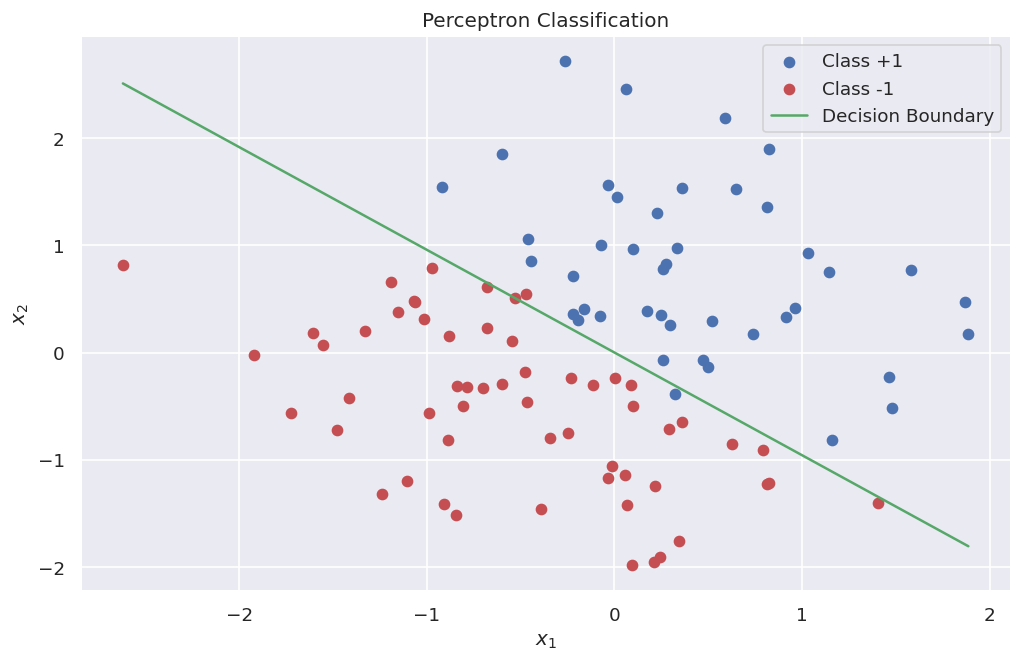

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Implementation
class Perceptron:
    def __init__(self, input_dim):
        self.w = np.zeros(input_dim)
        self.b = 0

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

    def train(self, X, y, epochs=100, eta=0.1):
        for _ in range(epochs):
            for xi, yi in zip(X, y):
                if yi * (np.dot(self.w, xi) + self.b) <= 0:
                    self.w += eta * yi * xi
                    self.b += eta * yi

# Generate some linearly separable data
np.random.seed(42)
X = np.random.randn(100, 2)
y = np.sign(X[:, 0] + X[:, 1] + 0.1 * np.random.randn(100))

# Train the perceptron
perceptron = Perceptron(input_dim=2)
perceptron.train(X, y)

plt.figure(figsize=(10, 6), dpi=120)

# Visualize the results
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='b', label='Class +1')
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], c='r', label='Class -1')

# Plot decision boundary
x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_range = -(perceptron.w[0] * x_range + perceptron.b) / perceptron.w[1]
plt.plot(x_range, y_range, 'g-', label='Decision Boundary')

plt.legend()
plt.title('Perceptron Classification')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

## Conclusion

The perceptron empirical risk provides a way to measure the performance of the perceptron model and guide its learning process. By minimizing this risk, we can find a separating hyperplane for linearly separable data. However, it's important to note that the perceptron algorithm is guaranteed to converge only for linearly separable data.

In practice, more advanced methods like Support Vector Machines (SVM) or logistic regression are often preferred, as they can handle non-linearly separable data and provide better generalization.